In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [31]:
gold_predict = pd.read_csv('../data/predict/r_gold_forecast1001to1825.csv', index_col=0)
bitCoin_predict = pd.read_csv('../data/predict/r_bitCoin_forecast1001to1825.csv', index_col=0)
lstm_gold = pd.read_csv('../data/predict/gold_price_predict.csv', index_col=0)
lstm_bitcoin = pd.read_csv('../data/predict/bitCoin_price_predict.csv', index_col=0)

In [32]:
gold_predict

,f.arima,f.arch,f.lm,f.gam
1,0.000000,0.000000,0.000000,0.000000
2,0.000361,0.000099,0.000332,0.000332
3,0.000044,0.000077,0.000296,0.000296
4,-0.000291,-0.000621,0.000295,0.000295
5,-0.000179,-0.000007,0.000282,0.000282
...,...,...,...,...
822,0.000341,0.000542,0.000460,0.000460
823,0.000807,0.000636,0.000459,0.000459
824,0.000877,0.000512,0.000435,0.000435
825,0.000007,-0.000324,0.000415,0.000415


In [33]:
lstm_gold_r = lstm_gold.diff(1)/lstm_gold
lstm_gold_r.loc[0]=lstm_gold_r.loc[1]
lstm_gold_r.index = list(range(1, len(lstm_gold_r)+1))
lstm_gold_r

,LSTM
1,-0.007053
2,-0.007053
3,-0.002205
4,-0.002440
5,0.003539
...,...
822,-0.000566
823,-0.006910
824,0.008414
825,-0.003962


In [34]:
lstm_bitcoin_r = lstm_bitcoin.diff(1)/lstm_bitcoin
lstm_bitcoin_r.loc[0]=lstm_bitcoin_r.loc[1]
lstm_bitcoin_r.index = list(range(1, len(lstm_bitcoin_r)+1))
lstm_bitcoin_r

,LSTM
1,-0.009462
2,-0.009462
3,-0.019214
4,0.007748
5,-0.010950
...,...
822,0.003609
823,0.019958
824,-0.013650
825,-0.045661


In [35]:
gold_predict = pd.concat([gold_predict, lstm_gold_r], axis=1)
bitCoin_predict = pd.concat([bitCoin_predict, lstm_bitcoin_r],axis=1)

In [36]:
gold_predict

,f.arima,f.arch,f.lm,f.gam,LSTM
1,0.000000,0.000000,0.000000,0.000000,-0.007053
2,0.000361,0.000099,0.000332,0.000332,-0.007053
3,0.000044,0.000077,0.000296,0.000296,-0.002205
4,-0.000291,-0.000621,0.000295,0.000295,-0.002440
5,-0.000179,-0.000007,0.000282,0.000282,0.003539
...,...,...,...,...,...
822,0.000341,0.000542,0.000460,0.000460,-0.000566
823,0.000807,0.000636,0.000459,0.000459,-0.006910
824,0.000877,0.000512,0.000435,0.000435,0.008414
825,0.000007,-0.000324,0.000415,0.000415,-0.003962


In [37]:
bitCoin_predict

,f.arima,f.arch,f.lm,f.gam,LSTM
1,0.024997,0.024997,0.024997,0.024997,-0.009462
2,0.004262,0.004728,0.000360,0.000360,-0.009462
3,0.003028,0.003384,0.000319,0.000319,-0.019214
4,0.001762,0.002128,0.000165,0.000165,0.007748
5,0.005033,0.005627,0.000356,0.000356,-0.010950
...,...,...,...,...,...
822,0.003719,0.003716,0.002507,0.002507,0.003609
823,0.001648,0.002273,0.002580,0.002580,0.019958
824,0.003849,0.003878,0.002613,0.002613,-0.013650
825,0.007499,0.006496,0.002362,0.002362,-0.045661


In [47]:
gold_price = pd.read_csv('../data/gold_complete.csv')['USD (PM)'][-826:]
gold_price = gold_price.diff(1)/gold_price
gold_price.iloc[0] = gold_price.iloc[1]
gold_predict['price'] = gold_price.values
gold_predict

,f.arima,f.arch,f.lm,f.gam,LSTM,price
1,0.000000,0.000000,0.000000,0.000000,-0.007053,-0.009070
2,0.000361,0.000099,0.000332,0.000332,-0.007053,-0.009070
3,0.000044,0.000077,0.000296,0.000296,-0.002205,0.000000
4,-0.000291,-0.000621,0.000295,0.000295,-0.002440,-0.003247
5,-0.000179,-0.000007,0.000282,0.000282,0.003539,0.006042
...,...,...,...,...,...,...
822,0.000341,0.000542,0.000460,0.000460,-0.000566,0.000000
823,0.000807,0.000636,0.000459,0.000459,-0.006910,-0.010793
824,0.000877,0.000512,0.000435,0.000435,0.008414,-0.009043
825,0.000007,-0.000324,0.000415,0.000415,-0.003962,0.001258


In [48]:
from sklearn.metrics import mean_squared_error

In [56]:
gold_mse_list = []
for i in range(5):
    actual = gold_predict.iloc[:,-1].values
    predict = gold_predict.iloc[:,i].values
    mse = mean_squared_error(actual, predict)
    gold_mse_list.append(mse)

In [57]:
gold_mse_list

[7.998790756157997e-05,
 8.104415431149466e-05,
 8.042373610770429e-05,
 8.042373610770429e-05,
 2.4248664859993746e-05]

Text(0, 0.5, 'Model')

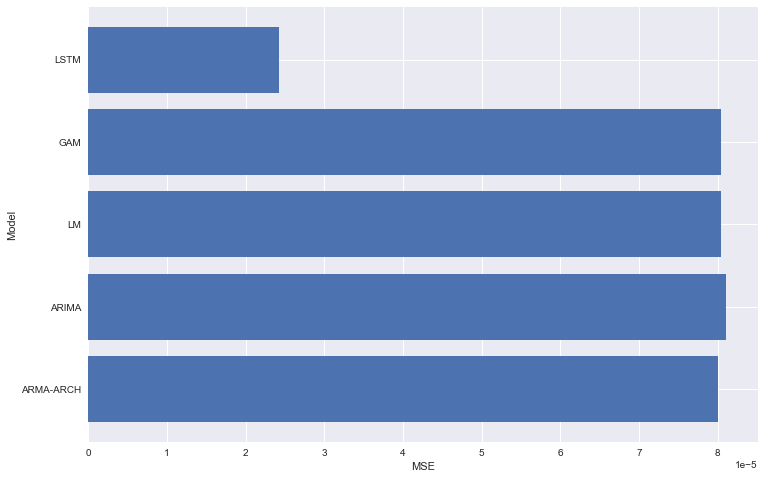

In [61]:
fig = plt.figure(figsize=[12, 8])
plt.barh(range(len(gold_mse_list)),gold_mse_list)
_ = plt.yticks( range(len(gold_mse_list)), ['ARMA-ARCH', 'ARIMA', 'LM', 'GAM', 'LSTM'])
plt.xlabel('MSE')
plt.ylabel('Model')


In [62]:
bitcoin_mse_list = []
for i in range(5):
    actual = bitCoin_predict.iloc[:,-1].values
    predict = bitCoin_predict.iloc[:,i].values
    mse = mean_squared_error(actual, predict)
    bitcoin_mse_list.append(mse)

Text(0, 0.5, 'Model')

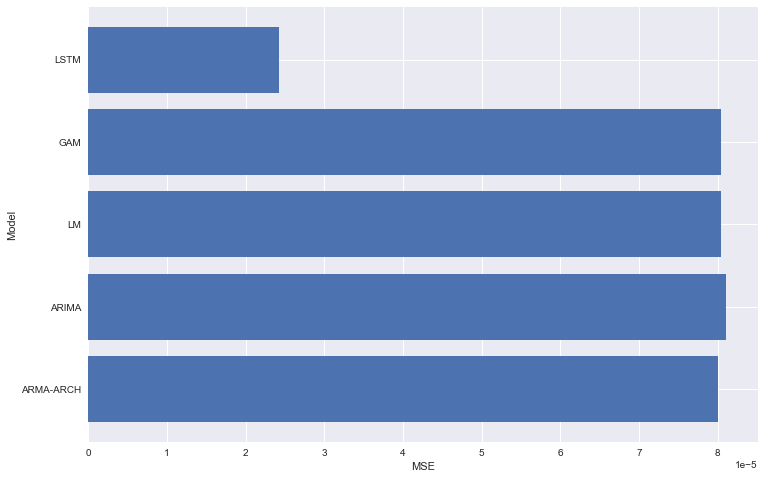

In [63]:
fig = plt.figure(figsize=[12, 8])
plt.barh(range(len(bitcoin_mse_list)),gold_mse_list)
_ = plt.yticks( range(len(bitcoin_mse_list)), ['ARMA-ARCH', 'ARIMA', 'LM', 'GAM', 'LSTM'])
plt.xlabel('MSE')
plt.ylabel('Model')
